*Page and Latex Commands*
$\newcommand{\C}{\mathbb{C}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\mP}{\mathcal{P}}
\newcommand{\bp}{\begin{pmatrix}}
\newcommand{\ep}{\end{pmatrix}}
$

In [10]:
# Python Imports
%matplotlib notebook
import math; import matplotlib.pyplot as plt; from mpl_toolkits.mplot3d import Axes3D; import pandas as pd; import numpy as np; 

### Game Theory in the Restaurant

**Location Analysis**

Line game.

In [16]:
#Determine game matrix with n possible positions
n=10
def f(x,y,n):
    if x==y:
        return 0
    if y>x:
        return y+x-n
    return n-x-y
A = np.array([[f(x,y,n) for x in range(n+1)] for y in range(n+1)])
print(A)

[[ 0  9  8  7  6  5  4  3  2  1  0]
 [-9  0  7  6  5  4  3  2  1  0 -1]
 [-8 -7  0  5  4  3  2  1  0 -1 -2]
 [-7 -6 -5  0  3  2  1  0 -1 -2 -3]
 [-6 -5 -4 -3  0  1  0 -1 -2 -3 -4]
 [-5 -4 -3 -2 -1  0 -1 -2 -3 -4 -5]
 [-4 -3 -2 -1  0  1  0 -3 -4 -5 -6]
 [-3 -2 -1  0  1  2  3  0 -5 -6 -7]
 [-2 -1  0  1  2  3  4  5  0 -7 -8]
 [-1  0  1  2  3  4  5  6  7  0 -9]
 [ 0  1  2  3  4  5  6  7  8  9  0]]


Skew symmetric matrix then $v(A)=0$ and if $X^*$ is optimal for player 1 then it is optimal for player 2.

Verify that the $v(A)=0$.

A saddle point in pure strategies iff 
$$v^-=\max_i\min_j a_{ij} = \min_j\max_i a_{ij}=v^+$$

In [17]:
print("v_min:=max({})={}".format(A.min(0), A.min(0).max()))
print("v_max:=min({})={}".format(A.max(1), A.max(1).min()))

v_min:=max([-9 -7 -5 -3 -1  0 -1 -3 -5 -7 -9])=0
v_max:=min([9 7 5 3 1 0 1 3 5 7 9])=0


Notice additionally that the saddle point is pure and at $(5,5)$.

Can be naturally extended to:

+ infintely many positions along an interval
+ infintely many players (assuming infinitely many positions along the interval)
+ 2D spatial orientation with Euclidean geometry
+ any other 'metric'

Check out the saddle point.

<IPython.core.display.Javascript object>


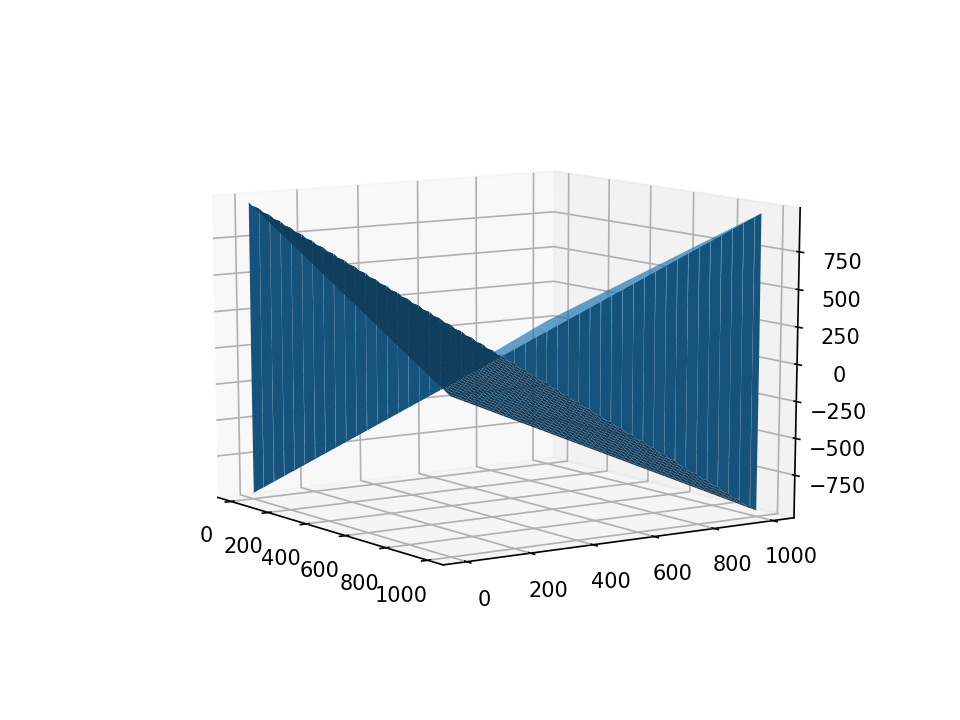

In [21]:
N=1000
f_3d = lambda x,y : math.copysign(x-y,(10-x-y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y=np.linspace(0,N,N+1),np.linspace(0,N,N+1)
x,y=np.meshgrid(x,y)
A = np.sign(x-y)*(N-x-y)
ax.plot_surface(x, y, A)

Same analysis applies.

In [22]:
print("v_min:=max({})={}".format(A.min(0), A.min(0).max()))
print("v_max:=min({})={}".format(A.max(1), A.max(1).min()))

v_min:=max([-999. -997. -995. ... -995. -997. -999.])=0.0
v_max:=min([999. 997. 995. ... 995. 997. 999.])=0.0


**Effort Analysis**

Suppose that we have a fixed percentage of what is being taken by taxes etc like a percentage of loss. Calculate optimal strategy for minimizing loss. Strategies for choice add up to 100% effort.

Advertising= 5%

Bank Charges = 2%

Credit Charges = 3 %

Insurance = 20%

Legal & Accounting = 15%

Maintenance = x%

Rent = y%

Supplies = z%

Salaries = s%

Utilities = t%

Taxes = u%

| Restaurant 1 | Advertising | Bank Charges | Credit Charges | Insurance | Legal & Accounting | Maintenance | Rent | Supplies | Salaries | Utilities |
|:-:| ---| ---| ---|--- |--- |--- |--- |--- |--- |--- |
|Service Quality| - | - | - | - | - | - | - | - | - |- |
|Diverse Menu| - | - | - | - | - | - | - | - | - |- |
|Service Time| - | - | - | - | - | - | - | - | - |- |
|*=*| - | - | - | - | - | - | - | - | - |- |
|*=*| - | - | - | - | - | - | - | - | - |- |
|*=*| - | - | - | - | - | - | - | - | - |- |
|*=*| - | - | - | - | - | - | - | - | - |- |
|*=*| - | - | - | - | - | - | - | - | - |- |
|*=*| - | - | - | - | - | - | - | - | - |- |

**Daily Specials Game**

Suppose two restaurants in pure competition (zero-sum game) with similar menu's (same action set) are offering a daily special on one menu item. If they offer the same special then the customers are evenly divided. If they offer different menu items then they recieve a share of the customer base that is closest to prefering that menu item. For example offering a hamberger in one restaurant vs another restaurant evenly divides the consumer base because they are opposite end of the spectrum. However if offered a burger at one restaurant vs a chicken sandwich at the second restaurant then the first restaurant will win the consumer base because the items are not sufficently diverse for the competition to be pure.

In [5]:
specials = pd.read_csv('specials.csv',index_col=0)
specials.head()

,Burger,Wings,Veggie,Burger_Soda,Wings_Soda,Veggie_Soda,Burger_Hefeweizen,Wings_Hefeweizen,Veggie_Hefeweizen,Burger_Pilsner,Wings_Pilsner,Veggie_Pilsner,Burger_Lager,Wings_Lager,Veggie_Lager
P1_P2,,,,,,,,,,,,,,,
Burger,0,1,-2,-1,0,-3,-2,-1,-4,-3,-2,-5,-4,-3,-6
Wings,-1,0,-1,-2,-1,-2,-3,-2,-3,-4,-3,-4,-5,-4,-5
Veggie,2,1,0,1,0,-1,0,-1,-2,-1,-2,-3,-2,-3,-4
Burger_Soda,1,2,-1,0,-1,0,-1,-2,-1,-2,-3,-2,-3,-4,-3
Wings_Soda,0,1,0,1,0,1,2,-1,0,1,-2,-1,0,-3,-2


In [6]:
A=specials.values
print(A)

[[ 0  1 -2 -1  0 -3 -2 -1 -4 -3 -2 -5 -4 -3 -6]
 [-1  0 -1 -2 -1 -2 -3 -2 -3 -4 -3 -4 -5 -4 -5]
 [ 2  1  0  1  0 -1  0 -1 -2 -1 -2 -3 -2 -3 -4]
 [ 1  2 -1  0 -1  0 -1 -2 -1 -2 -3 -2 -3 -4 -3]
 [ 0  1  0  1  0  1  2 -1  0  1 -2 -1  0 -3 -2]
 [ 3  2  1  0 -1  0 -1 -2  1  0 -3  0 -1 -4 -1]
 [ 2  3  0  1 -2  1  0 -1  2  3 -2  1  2 -3  0]
 [ 1  2  1  2  1  2  1  0  3  1 -3  2  1 -4  1]
 [ 4  3  2  1  0 -1 -2 -3  0  4 -2  3  4 -3  2]
 [ 3  4  1  2 -1  0 -3 -1 -4  0 -3  4  3 -4  3]
 [ 2  3  2  3  2  3  2  3  2  3  0  5  6 -3  4]
 [ 5  4  3  2  1  0 -1 -2 -3 -4 -5  0  5 -4  5]
 [ 4  5  2  3  0  1 -2 -1 -4 -3 -6 -5  0 -3  6]
 [ 3  4  3  4  3  4  3  4  3  4  3  4  3  0  7]
 [ 6  5  4  3  2  1  0 -1 -2 -3 -4 -5 -6 -7  0]]


In [7]:
print("v_min:=max({})={}".format(A.min(0), A.min(0).max()))
print("v_max:=min({})={}".format(A.max(1), A.max(1).min()))

v_min:=max([-1  0 -2 -2 -2 -3 -3 -3 -4 -4 -6 -5 -6 -7 -6])=0
v_max:=min([1 0 2 2 2 3 3 3 4 4 6 5 6 7 6])=0


### Profit Focused Decision Making in Competing Restaurants


**Expenditure Estimates**

| (Location, Capacity) | Advertising | Bank Charges | Credit Charges | Insurance | Legal & Accounting | Maintenance | Rent | Supplies | Utilities |
|:-:| ---| ---| ---|--- |--- |--- |--- |--- |--- |
|*(1, high)*| - | - | - | - | - | - | - | - | - |
|*(1, medium)*| - | - | - | - | - | - | - | - | - |
|*(1, low)*| - | - | - | - | - | - | - | - | - |
|*(2, high)*| - | - | - | - | - | - | - | - | - |
|*(2, medium)*| - | - | - | - | - | - | - | - | - |
|*(2, low)*| - | - | - | - | - | - | - | - | - |
|*(3, high)*| - | - | - | - | - | - | - | - | - |
|*(3, medium)*| - | - | - | - | - | - | - | - | - |
|*(3, low)*| - | - | - | - | - | - | - | - | - |


**Relocation Matrix Game (Bi-Annual)**

| Restaurant (1,2) | location 1| location 2|  location 3 |
| :-:| ---| ---|--- |
|*high capacity* | sum row 1 | sum row 2| sum row 3|
| *med capacity* | sum row 4 | sum row 5 | sum row 6 |
| *low capcaity* | sum row 7 | sum row 8 | sum row 9 |

**Management Matrix Game (Quarterly)**

| Restaurant # | location 1| location 2|  location 3 |
| :-:| ---| ---|--- |
|*high capacity* |b | c| d|
| *med capacity* |b |c |d |
| *low capcaity* |b |c |d |



**Special of the Day (Daily)**

|  a | b| c|d |
| ---| ---| ---|--- |
|a |b | c| d|
| a|b |c |d |

In [8]:
r1_biannual = pd.read_csv('r1_biannual.csv',index_col=0)
r2_biannual = pd.read_csv('r2_biannual.csv',index_col=0)

r1_biannual.head()

,rent,tax,salary,est gross
1h,-2,-2,-2,4
1m,-2,-2,-2,3
1l,-2,-2,-2,2
2h,-2,-2,-2,4
2m,-2,-2,-2,3


In [9]:
totals = r1_payment.sum(axis=1).tolist()
r1_GM = pd.DataFrame({'location 1':np.array(totals)[0:3], 'location 2':np.array(totals)[3:6], 'location 3':np.array(totals)[6:]})
r1_GM.head()

NameError: name 'r1_payment' is not defined

How to start the game: Assume that the initial buy in is zero for all buildings. Then adjust this after the first step for whichever building you do not purchase.